### 主色聚类
1.批量读取图片
2.分别聚类分析
3.整合数据

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

### 1.聚类提取单个图像的色彩

#### 定义聚类分析提取颜色的函数

In [2]:
def ClusterImage(img_path,k):
    # 读取图像
    img = cv2.imread(img_path) 
    
    # 将图像转换成rgb模式 | rgb与bgr有区别
    rgb_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 

    # 改变数组的形状
    pixels = rgb_image.reshape((-1,3))
    # reshape 方法用于改变数组的形状，而不改变其数据内容。
    # 在这个代码中，rgb_image 是一个表示 RGB 图像的 NumPy 数组。
    # RGB 图像通常是一个三维数组，其形状为 (height, width, 3),3 代表每个像素由红（R）、绿（G）、蓝（B）三个通道组成
    # 而 -1 是一个特殊的参数，它表示NumPy会根据数组的总元素数量和已知的维度（这里是第二维为3）自动计算该维度的大小
    # 在这个例子中， 3 明确指定了新数组的第二维大小为 3，也就是每个元素仍然由三个值（RGB 通道）组成。

    # 聚合操作,指定k个聚合中心
    kmeans = KMeans(n_clusters = k)

    # 根据rgb图像训练模型
    kmeans.fit(pixels)

    # 将kmeans训练的中心点转换整数成
    colors = kmeans.cluster_centers_.astype(int)    

    # 返回5个主要的colors结果
    return colors

In [3]:
# 返回的colors是数组
colors = ClusterImage(img_path = '5185d53bfdc9f03fd5001493.jpg',k = 5)
colors

array([[159, 156, 155],
       [184, 188, 192],
       [ 73,  76,  48],
       [108, 116,  67],
       [ 37,  41,  26]])

enumerate 函数的基本语法为 enumerate(iterable, start=0)，其中 iterable 是任何可迭代对象（如列表、元组、字符串等），start 是索引的起始值，默认为0

#### 可视化色条

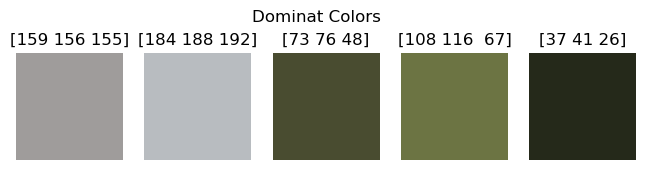

In [4]:
# 可视化色条
# 调整画布大小
plt.figure(figsize= (8,2))

# 遍历每一个颜色块
for i,color in enumerate(colors): # 将数组变成索引序列
    plt.subplot(1,5,i+1) # 5个色块的第i+1个图
    plt.imshow(np.ones((50,50,3),dtype = 'uint8')*color) # 定义一个 50x50 像素的 RGB 图像数组,图像使用unit8位整数来表达图像
    plt.title(f'{color}') # 添加标题
    plt.axis('off') # 关闭当前子图的坐标轴显示，使图像更加简洁

#图像主标题
plt.suptitle('Dominat Colors')

plt.show()

### 插叙一段色彩的实验

#### 标准色彩的颜色值字典

In [5]:
# 标准颜色与列表对应
standard_colors = {
    'red':[255,0,0],
    'green':[0,255,0],
    'blue':[0,0,255],
    'yellow':[255,255,0],
    'cyan':[0,255,255],
    'magenta':[255,0,255],
    'gray':[128,128,128],
    'black':[0,0,0],
    'white':[255,255,255]
}

#### 定义色彩距离最近的函数color match_to_standard_color

In [6]:
from scipy.spatial import distance
# scipy.spatial.distance 模块提供了一系列用于计算不同类型距离的函数，可用于数据分析、机器学习、图像处理等领域，
# 比如在聚类分析中计算样本之间的距离，以确定样本的相似性。

# match_to_standard_color 函数的主要功能是将输入的颜色 color 与一组标准颜色 standard_colors 进行匹配，并返回匹配结果 matched。
# 具体来说，它会从 standard_colors 中找出与输入颜色最接近的标准颜色。
def match_to_standard_color(color,standard_colors):
    
    min_dist = float('inf') # 初始化最小距离为正无穷大
    matched = None # 初始化匹配的标准颜色名称为 None
    
    for name,std_color in standard_colors.items(): # .items()遍历字典里的每一个颜色
        d = distance.euclidean(color,std_color) # 计算输入颜色与当前标准颜色之间的欧几里得距离
        if d < min_dist: # 如果当前距离小于最小距离
            min_dist = d # 更新最小距离为当前距离 
            matched = name # 更新匹配的标准颜色名称为当前标准颜色的名称
    return matched # 返回匹配的标准颜色名称

In [7]:
matched_list = []
for color in colors: # 遍历五个主要的颜色,找相近的standard color
    matched = match_to_standard_color(color,standard_colors)
    matched_list.append(matched)

matched_list

['gray', 'gray', 'gray', 'gray', 'black']

#### 统一颜色结构

#### 定义rgb转化为hsv的函数

使用欧氏距离在 RGB 空间中直接匹配标准颜色容易误判。因为：

RGB 空间不符合人眼感知距离（例如 [120,130,70] 和 [180,180,180] 距离接近，但感知颜色差别很大）；

灰色在 RGB 中是 R≈G≈B 的区域，很多“偏灰绿”也会被归为灰色；

In [8]:
# 将RGB转化为HSV的函数
def rgb_to_hsv_color(rgb_color):
    rgb_pixel = np.uint8([[rgb_color]])
    # np.uint8 是 NumPy 中的无符号 8 位整数类型。这行代码将输入的 rgb_color 转换为一个二维数组，并且数据类型为 np.uint8。
    # 之所以使用二维数组，是因为 cv2.cvtColor 函数要求输入的图像数据是一个二维或三维的数组。
    
    hsv_pixel = cv2.cvtColor(rgb_pixel,cv2.COLOR_RGB2HSV)
    # 将转化为二维数组的unit8 pixel从RGB转化为HSV
    
    return hsv_pixel[0][0]
    # 这行代码返回转换后的 HSV 颜色值。由于之前将输入转换为了二维数组，因此这里通过 hsv_pixel[0][0] 取出实际的 HSV 颜色值。
    # return hsv_pixel[0][0]：由于hsv_pixel是一个二维数组，hsv_pixel[0][0]用于提取数组中第一个元素的值，即转换后的HSV颜色值。

#### 定义判断颜色属于标准色彩的函数 match_hsv_to_color

建立标准色列表 -> 将颜色转化为HSV格式 ->在 HSV 色彩空间 中匹配

OpenCV 的 HSV 色相范围是 0-180（而非标准 HSV 的 0-360），因此数值需减半理解。

In [9]:
def match_hsv_to_color(hsv_color):
    h,s,v = hsv_color

    # 区分灰阶颜色
    if s < 30:
        if v < 50:
            return 'black'
        elif v > 200:
            return 'white'
        else:
            return 'gray'

    # 色相区域判断(OpenCV hue范围为 0-180)
    if h < 10 or h >= 160:
        return 'red'
    elif 10 <= h < 25:
        return 'orange'
    elif 25 <= h <35:
        return 'yellow'
    elif 85 <= h < 125:
        return 'green'
    elif 125 <= h < 145:
        return 'cyan'
    elif 145 <= h < 160:
        return 'purple'
    else:
        return 'other'

#### 范例图片的5个主要颜色的标准色

In [10]:
for color in colors: # 遍历5个主要的颜色 
    hsv = rgb_to_hsv_color(color)
    label = match_hsv_to_color(hsv)
    print (f"RGB {color} -> HSV {hsv} -> {label}")

RGB [73 76 48] -> HSV [33 94 76] -> yellow
RGB [184 188 192] -> HSV [105  11 192] -> gray
RGB [108 116  67] -> HSV [ 35 108 116] -> other
RGB [159 156 155] -> HSV [  8   6 159] -> gray
RGB [37 41 26] -> HSV [38 93 41] -> other


可以看到不同种类的簇最终还是被归纳成了相同的颜色,所以最好是归类之后还要把相同颜色的簇归纳在一起

所以这也是为什么要整合数据

## 2.批量处理图片

### 主色聚类·读取所有的图片

In [6]:
# 读取所有的图片
from pathlib import Path

folder_path = Path('/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset')
jpg_files = []
for f in folder_path.iterdir(): # 只查看当前目录的内容,遍历当前文件夹
    if f.is_file() and f.suffix.lower() == '.jpg':
        # 在 Python 中，f.is_file() 通常是 pathlib 模块里 Path 对象的一个方法。
        # f.is_file() 用于判断 f 所代表的路径是否为一个普通文件。
        # 如果该路径指向一个普通文件，则返回 True；如果指向的是目录、符号链接、设备文件等其他非普通文件类型，或者路径不存在，那么返回 False。
        jpg_files.append(f)

In [7]:
len(jpg_files)

110688

#### 定义聚类分析函数

In [8]:
def ClusterImage_Updated(img_path,k):
    img = cv2.imread(img_path)
    rgb_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    pixels = rgb_image.reshape((-1,3))
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)
    # 计算各颜色比
    labels,counts = np.unique(kmeans.labels_,return_counts = True)
    # kmeans.labels_ ： 这是 KMeans 聚类模型中，每个样本（图像中的一个像素）对应的聚类标签。
    # 使用 np.unique 函数统计每个聚类标签的出现次数，labels 存储唯一的聚类标签，counts 存储每个标签的出现次数
    total = counts.sum()
    ratios = counts / total
    return colors,ratios # 返回每个簇中心的颜色及其比例

#### 统一颜色结构的函数

In [9]:
# 标准颜色与列表对应
standard_colors = {
    'red':[255,0,0],
    'green':[0,255,0],
    'blue':[0,0,255],
    'yellow':[255,255,0],
    'cyan':[0,255,255],
    'magenta':[255,0,255],
    'gray':[128,128,128],
    'black':[0,0,0],
    'white':[255,255,255]
}

##### 定义rgb转化为hsv的函数

使用欧氏距离在 RGB 空间中直接匹配标准颜色容易误判。因为：

RGB 空间不符合人眼感知距离（例如 [120,130,70] 和 [180,180,180] 距离接近，但感知颜色差别很大）；

灰色在 RGB 中是 R≈G≈B 的区域，很多“偏灰绿”也会被归为灰色；

In [10]:
# 将RGB转化为HSV的函数
def rgb_to_hsv_color(rgb_color):
    rgb_pixel = np.uint8([[rgb_color]])
    # np.uint8 是 NumPy 中的无符号 8 位整数类型。这行代码将输入的 rgb_color 转换为一个二维数组，并且数据类型为 np.uint8。
    # 之所以使用二维数组，是因为 cv2.cvtColor 函数要求输入的图像数据是一个二维或三维的数组。
    
    hsv_pixel = cv2.cvtColor(rgb_pixel,cv2.COLOR_RGB2HSV)
    # 将转化为二维数组的unit8 pixel从RGB转化为HSV
    
    return hsv_pixel[0][0]
    # 这行代码返回转换后的 HSV 颜色值。由于之前将输入转换为了二维数组，因此这里通过 hsv_pixel[0][0] 取出实际的 HSV 颜色值。
    # return hsv_pixel[0][0]：由于hsv_pixel是一个二维数组，hsv_pixel[0][0]用于提取数组中第一个元素的值，即转换后的HSV颜色值。

##### 定义判断颜色属于标准色彩的函数 match_hsv_to_color

建立标准色列表 -> 将颜色转化为HSV格式 ->在 HSV 色彩空间 中匹配

OpenCV 的 HSV 色相范围是 0-180（而非标准 HSV 的 0-360），因此数值需减半理解。

In [11]:
def match_hsv_to_color(hsv_color):
    h,s,v = hsv_color

    # 区分灰阶颜色
    if s < 30:
        if v < 50:
            return 'black'
        elif v > 200:
            return 'white'
        else:
            return 'gray'

    # 色相区域判断(OpenCV hue范围为 0-180)
    if h < 10 or h >= 160:
        return 'red'
    elif 10 <= h < 25:
        return 'orange'
    elif 25 <= h <35:
        return 'yellow'
    elif 85 <= h < 125:
        return 'green'
    elif 125 <= h < 145:
        return 'cyan'
    elif 145 <= h < 160:
        return 'purple'
    else:
        return 'other'

#### 整合数据的函数

为什么需要聚合数据？

比如我们得到结果[‘grey’,‘grey’,’white’,’black’,’green’]
我们需要聚合相同的颜色，这样才能得到整个图片真实的颜色比例。

In [12]:
import pandas as pd
from collections import OrderedDict
# OrderedDict 是 Python 标准库中 collections 模块提供的一种特殊的字典类型，它和普通的 dict 类似，但它会保留键值对插入的顺序。

def merge_color_ratios(matched_colors,color_ratios):
    # matched_colors 里面就是类似 [‘grey’,‘grey’,’white’,’black’,’green’]这样的结构
    merged = OrderedDict()
    for label,ratio in zip(matched_colors,color_ratios):
        if label in merged: # 如果已经出现了这个颜色,那么就把相同颜色出现的加起来
            merged[label] = ratio + merged[label]
        else: # 如果这个颜色没有出现,就保留这个颜色
            merged[label] = ratio
    merged_labels = list(merged.keys())
    merged_ratios = list(merged.values())
    return merged_labels,merged_ratios

### 主色聚类·聚类分析 + 整合数据 | 前面的步骤是在批量读取图片 + 定义函数

In [13]:
### 主色聚类
def GetMainColor(img_path,k):
    image_data = {}
    hsvs = []
    labels = []

    ### 分别聚类分析(前面有单独的一步批量读取图片)
    colors,ratios = ClusterImage_Updated(img_path=img_path , k = 5)

    ### 分别聚类分析 | 统一颜色结构
    for color in colors:
        hsv = rgb_to_hsv_color(color)
        hsvs.append(hsv)
        label = match_hsv_to_color(hsv)
        labels.append(label)

    ### 整合数据
    matched_colors,matched_ratios = merge_color_ratios(labels,ratios)

    image_data = {
        'image_path': img_path,
        'cluster_centers_rgb': colors,
        'color_ratios_raw': ratios,
        'cluster_centers_hsv': hsvs,
        'matched_colors_raw': labels,
        'matched_colors': matched_colors,
        'color_ratios_matched': matched_ratios
    }

    return image_data

In [14]:
image_data = GetMainColor(img_path = '/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset/5185d53bfdc9f03fd5001493.jpg',k=5)

In [15]:
df = pd.DataFrame.from_dict(image_data,orient = 'index').reset_index().rename(columns = {'index':'image_path'})
# 这部分代码使用 pandas 库的 DataFrame.from_dict 方法将字典 image_data 转换为一个 DataFrame 对象。
# orient='index' 表示字典的键（key）将作为 DataFrame 的行索引，字典的值（value）将作为 DataFrame 的列
# .RESET_INDEX()这一步操作会重置 DataFrame 的索引。原本作为行索引的字典键会被转换为 DataFrame 的一列，同时生成一个新的整数索引。
df

,image_path,0
0,image_path,/Users/zhaojunran/Documents/Python_Urban_Perce...
1,cluster_centers_rgb,"[[159, 156, 156], [73, 77, 49], [108, 117, 67]..."
2,color_ratios_raw,"[0.13671666666666665, 0.16260833333333333, 0.1..."
3,cluster_centers_hsv,"[[0, 5, 159], [34, 93, 77], [35, 109, 117], [3..."
4,matched_colors_raw,"[gray, yellow, other, other, gray]"
5,matched_colors,"[gray, yellow, other]"
6,color_ratios_matched,"[0.44842499999999996, 0.16260833333333333, 0.3..."


In [16]:
jpg_files

[PosixPath('/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset/51415142fdc9f04926007f43.jpg'),
 PosixPath('/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset/50f5ed9afdc9f065f0008e32.jpg'),
 PosixPath('/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset/513e6050fdc9f0358700b395.jpg'),
 PosixPath('/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset/50f5eb28fdc9f065f0008096.jpg'),
 PosixPath('/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset/50f5ec32fdc9f065f00087a7.jpg'),
 PosixPath('/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset/513e200cfdc9f0358700a0ce.jpg'),
 PosixPath

In [18]:
images_data = []
folder_path = '/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset'
for img in jpg_files:
    img_path = f'{img}'
    try:
        image_data = GetMainColor(img_path=str(img_path), k=5)
        image_data['file_name'] = img
        images_data.append(image_data)

    except Exception as e:
        print(f'Failed to process{img}:{e}')
        continue # 跳过当前图片,下一个

img_df = pd.DataFrame(images_data)

In [19]:
img_df.to_csv('imgs_data.csv')

In [20]:
import cv2
import numpy as np

def extract_hsv_statistics(image_path):
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        raise ValueError(f"无法读取图像：{image_path}")
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(img_hsv)
    stats = {
        'h_mean': np.mean(h),
        
        'h_max': np.max(h),
        's_mean': np.mean(s),
        's_std': np.std(s),
        's_max': np.max(s),
        'v_mean': np.mean(v),
        'v_std': np.std(v),
        'v_max': np.max(v),
    }
    return stats

In [21]:
stats = extract_hsv_statistics("/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/gsv/final_photo_dataset/5185d53bfdc9f03fd5001493.jpg")
stats

{'h_mean': np.float64(62.6182),
 'h_max': np.uint8(177),
 's_mean': np.float64(65.54335),
 's_std': np.float64(60.20273640605965),
 's_max': np.uint8(255),
 'v_mean': np.float64(126.51446666666666),
 'v_std': np.float64(61.20519210586268),
 'v_max': np.uint8(255)}